# Accessing Downsampled Data from BossDB

Many datasets on BossDB have been downsampled to provide lower resolutions versions of the data for faster access and quicker visualization. 

To see if a dataset has lower resolutions available you can use the array function from Intern. We will show you below. 

However, you can also use the [bossdb management console](https://api.bossdb.io/v1/mgmt/) to view downsampled status and hierarchy levels. 

First, check the `Experiment Details` page for the experiment you are interested. In the `Experiment Properties` section you will see a `Num hierarchy levels` section. This will tell you how many different resolution levels there are. See our [API documentation](https://docs.theboss.io/docs/get-downsample) for more information on how downsampling is done. In general, for each level of downsampling the data is downsampled by a factor of 2. If the dataset is anisotropic, the data is only downsampled in the x and y directions.

[https://api.bossdb.io/v1/mgmt/resources/prasad/prasad2020](https://api.bossdb.io/v1/mgmt/resources/prasad/prasad2020) for this dataset you can see that there are 7 levels of downsampling.

Next, check the `Channel Details` page. If a dataset has been downsampled you will see a green box with 'Downsampled' next to 'Downsampled Status' at the top of the channel details page. See here for an example of a channel that has been downsampled: [https://api.bossdb.io/v1/mgmt/resources/prasad/prasad2020/image](https://api.bossdb.io/v1/mgmt/resources/prasad/prasad2020/image) 

In [1]:
from intern import array
import matplotlib.pyplot as plt

In [2]:
dataset_res_0 = array("bossdb://prasad/prasad2020/image")

In [3]:
# this is the size of the original dataset
dataset_res_0.shape

(720, 2048, 6144)

In [4]:
slice_res_0 = dataset_res_0[300, :,:]

In [5]:
slice_res_0.shape

(2048, 6144)

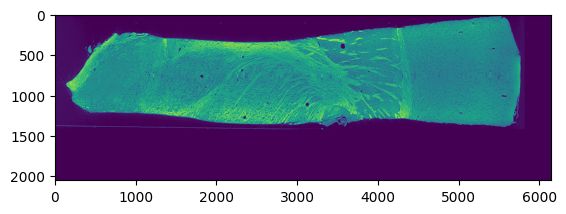

In [6]:
plt.imshow(slice_res_0)

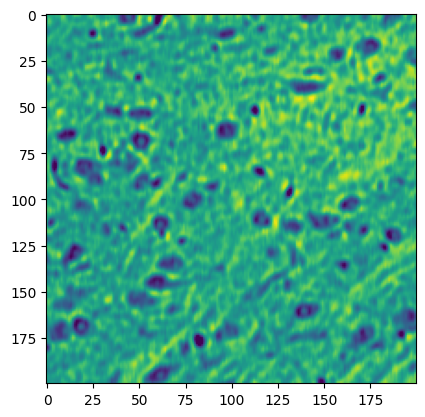

In [7]:
plt.imshow(slice_res_0[500:700, 2000:2200])

This dataset has 5 levels. This means it has been downsampled 4 times (the levels include the original (0) resolution). We can view the data at any of these levels.  

To do this, we can set the resolution level when we call `array`. 

In [8]:
dataset_res_4 = array("bossdb://prasad/prasad2020/image", resolution=4)

In [9]:
dataset_res_4.shape

(720, 128, 384)

You can see this dataset is much smaller! This is the smallest resolution. Accessing the data will be much faster.

In [10]:
slice_res_4 = dataset_res_4[300:301, :,:]

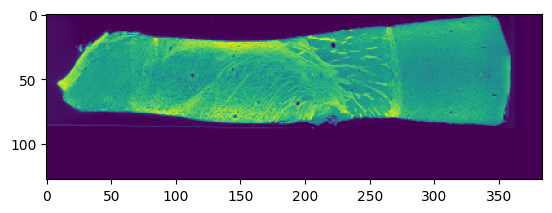

In [11]:
plt.imshow(slice_res_4)

Since this dataset is anisotropic, the data is only downsampled in the x and y directions. We can compare the original and downsampled data at the same slice.

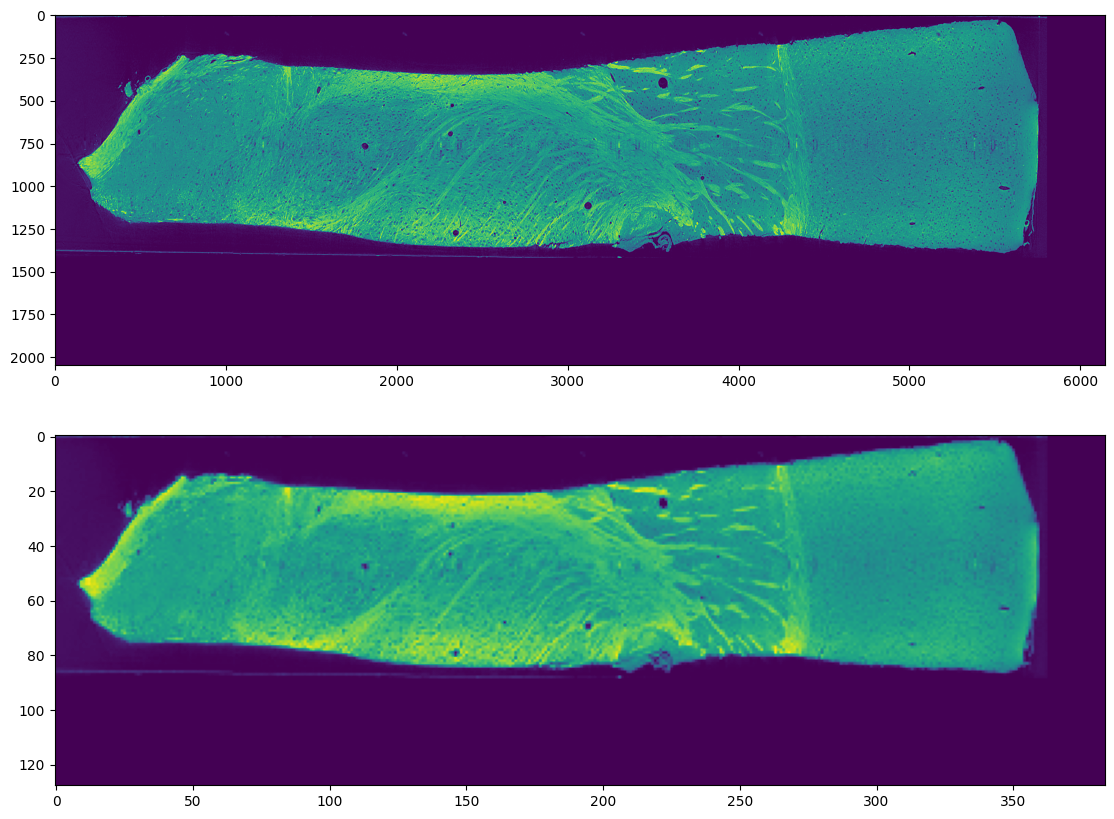

In [12]:
fig, axes = plt.subplots(2,1, figsize=(40,10))
axes[0].imshow(slice_res_0)
axes[1].imshow(slice_res_4)
plt.show()

Let's view a resolution in the middle.

In [13]:
dataset_res_2 = array("bossdb://prasad/prasad2020/image", resolution=2)
dataset_res_2.shape

(720, 512, 1536)

In [14]:
slice_res_2 = dataset_res_2[300:301, :,:]

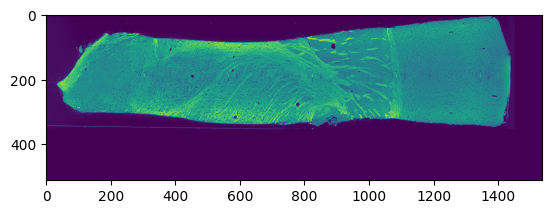

In [15]:
plt.imshow(slice_res_2)

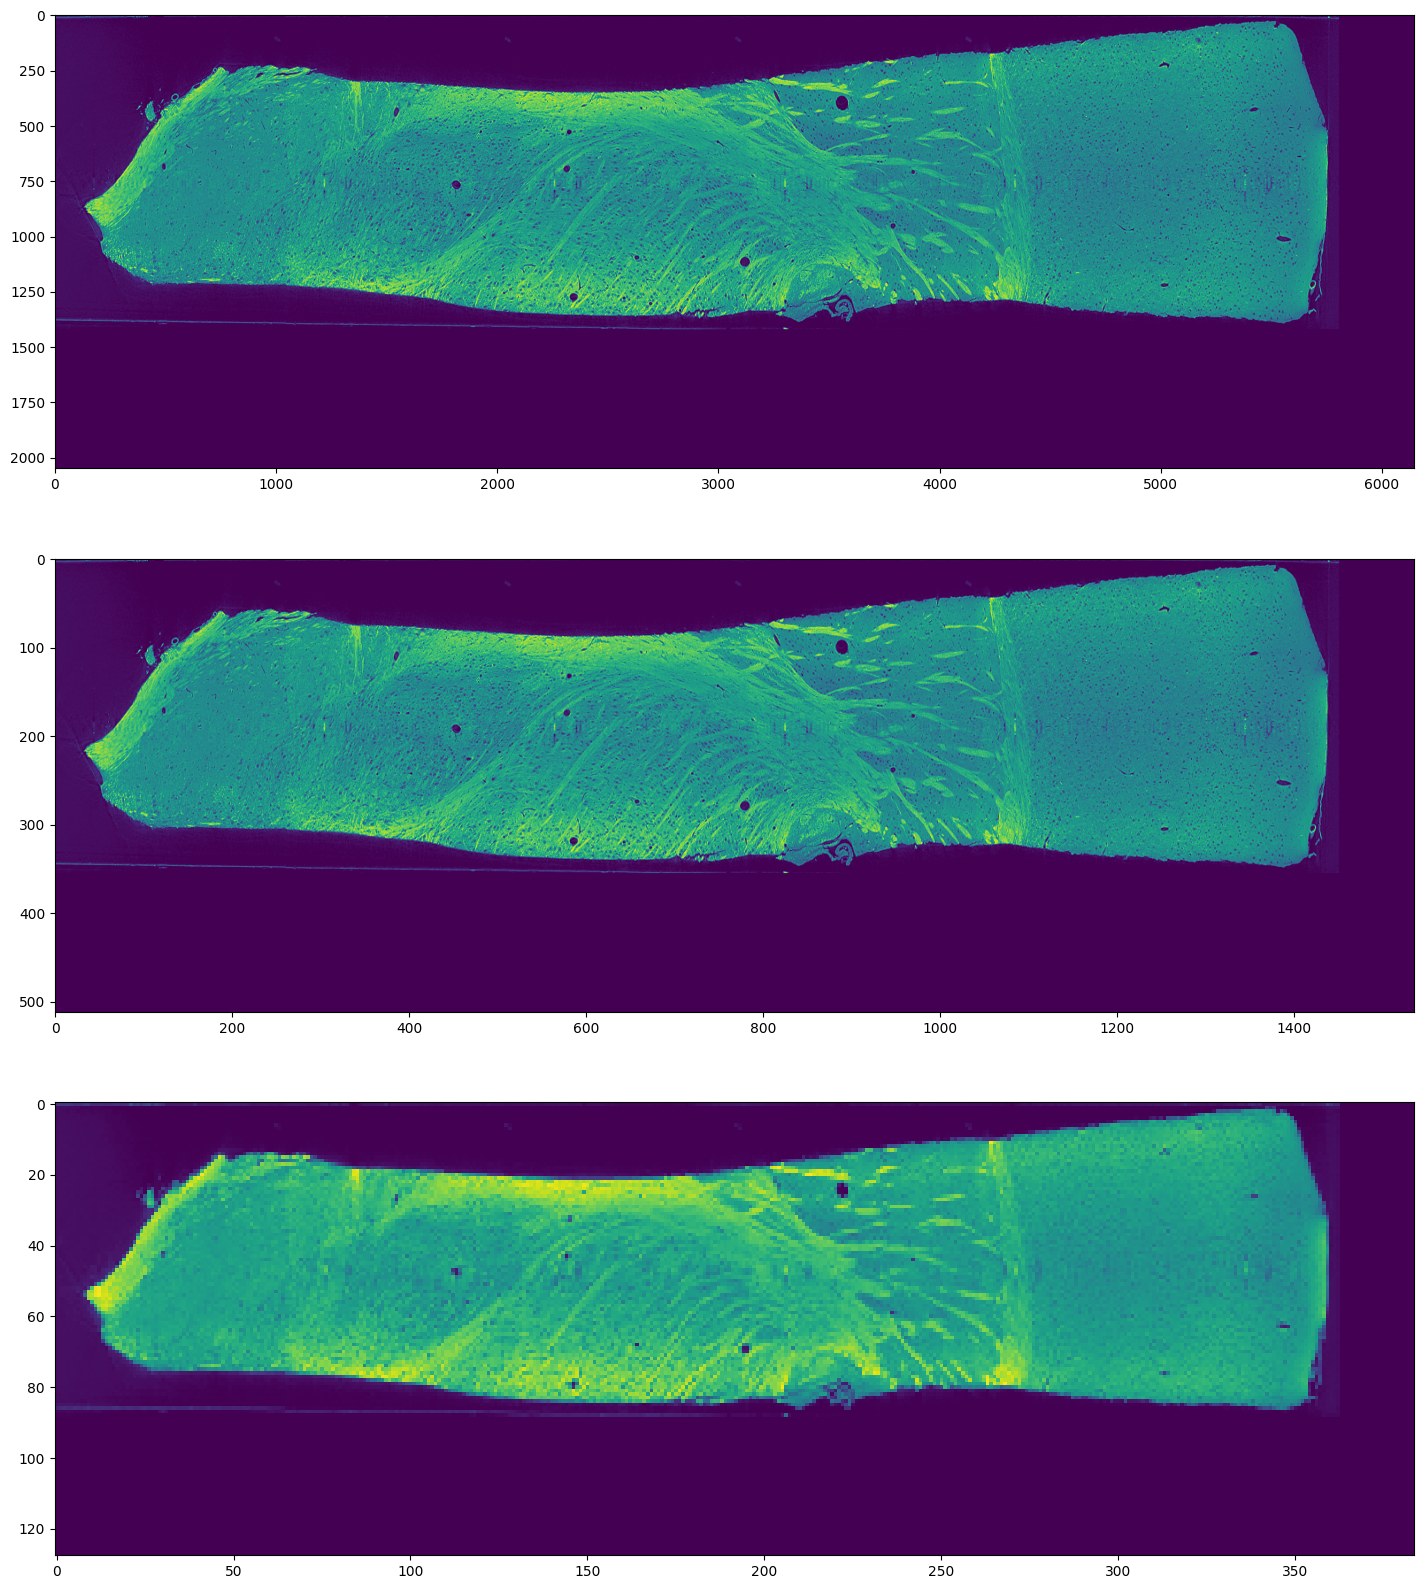

In [16]:
fig, axes = plt.subplots(3,1, figsize=(40,20))
axes[0].imshow(slice_res_0)
axes[1].imshow(slice_res_2)
axes[2].imshow(slice_res_4)
plt.show()